<h2>Hyperparameter Optimization - RandomizedSearchCV - XGBoost</h2>

In [6]:
import pandas as pd
import seaborn as sns
import xgboost

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

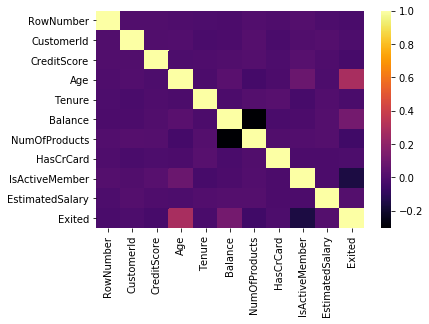

In [11]:
sns.heatmap(df.corr(),cmap='inferno')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
geography = pd.get_dummies(df['Geography'],drop_first=True)

In [16]:
df = pd.concat([df,geography],axis=1)

In [21]:
df = df.drop('Geography',axis=1)

In [22]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [23]:
gender = pd.get_dummies(df['Gender'],drop_first=True)
df = pd.concat([gender,df],axis=1)
df = df.drop('Gender',axis=1)
df.head()

,Male,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,0,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,0,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,0,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,0,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [24]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [25]:
df.head()

,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,0,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,0,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,0,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,0,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [26]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [45]:
classifier = xgboost.XGBClassifier()

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
params = {
    "learning_rate"     :     [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth"         :     [3, 4, 5, 6, 7, 8, 10, 12, 15],
    "min_child_weight"  :     [1, 3, 5, 7],
    "gamma"             :     [0.0 , 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree"  :     [0.3, 0.4, 0.5, 0.7] 
}

In [51]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [52]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   20.4s finished
C:\Users\f5021308\AnacondaNew\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [53]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [59]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
from sklearn.model_selection import cross_val_score

In [60]:
score = cross_val_score(classifier,X,y,cv=10)

C:\Users\f5021308\AnacondaNew\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [63]:
score.mean()

0.8633